In [1]:
subject_id = "400"

manifest_path="/scratch/gilbreth/akamsali/Research/Makin/ecog2txt-pytorch/conf/mocha-1_word_sequence.yaml"

In [ ]:
from ecog2txt_pytorch.trainers.single_subject_trainer import SingleSubjectTrainer

trainer = SingleSubjectTrainer(subject_id=subject_id, manifest_path=manifest_path)

training_metrics = trainer.train_and_evaluate()

In [3]:
import json

with open('metrics.json', 'w') as f:
    json.dump(training_metrics, f)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

train_loss = []
val_loss = []
val_WER = []
a = training_metrics
for block in a:
    train_loss.append(a[block]['train_loss'])
    val_loss.append(a[block]['val_loss'])
    val_WER.append(a[block]['val_WER'])
    
train_loss_avg = np.average(np.array(train_loss), axis=0)
val_loss = np.average(np.array(val_loss), axis=0)
val_WER = np.average(np.array(val_WER), axis=0)

train_loss_err = np.std(np.array(train_loss), axis=0)
val_loss_err = np.std(np.array(val_loss), axis=0)
val_WER_err = np.std(np.array(val_WER), axis=0)

epochs = np.arange(1,51)

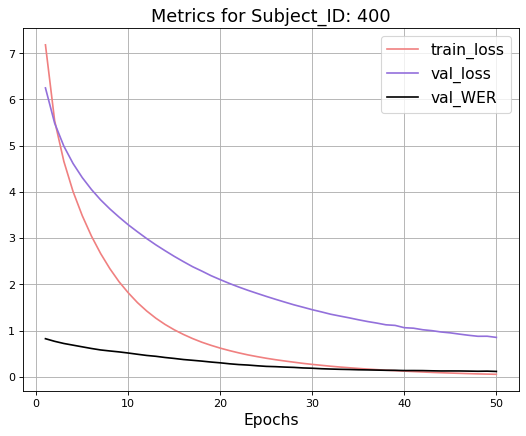

In [10]:
plt.figure(figsize=(8,6), dpi=80)
plt.plot(epochs, train_loss_avg, label='train_loss', color='lightcoral')
plt.plot(epochs, val_loss, label='val_loss', color='mediumpurple')
plt.plot(epochs, val_WER, label='val_WER', color='black')

plt.xlabel("Epochs", fontsize=14)
plt.title("Metrics for Subject_ID: 400", fontsize=16)
plt.legend(fontsize=14)
plt.grid()
plt.show()

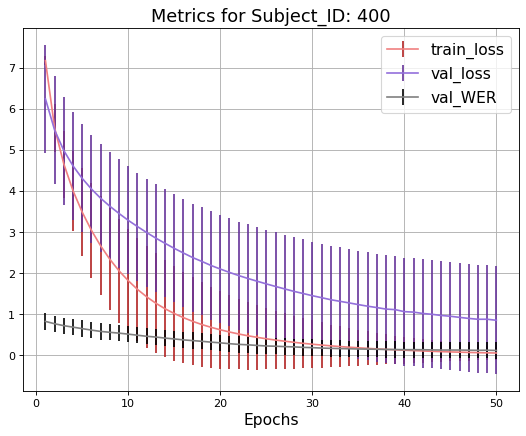

In [8]:
plt.figure(figsize=(8,6), dpi=80)
plt.errorbar(epochs, train_loss_avg, yerr=train_loss_err, label='train_loss', color='lightcoral', ecolor='firebrick')
plt.errorbar(epochs, val_loss, yerr=val_loss_err,label='val_loss', color='mediumpurple',ecolor='rebeccapurple')
plt.errorbar(epochs, val_WER, yerr=val_WER_err,label='val_WER', color='grey', ecolor='black')

plt.xlabel("Epochs", fontsize=14)
plt.title("Metrics for Subject_ID: 400", fontsize=16)
plt.legend(fontsize=14)
plt.grid()
plt.show()